In [394]:
import pandas as pd
import numpy as np
df_main = pd.read_csv('smpl_attempts.csv', sep = ';')
#В таблице  встречаются строки-дубликаты. Уберем их, предположив, что невозможно с точностью до миллисекунды совершить сразу 
#несколько действий подряд
df_main.drop_duplicates(inplace=True)
print(df_main.info())
df_main.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10387712 entries, 0 to 22231213
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   uid         object
 1   action      object
 2   level       int64 
 3   event_time  int64 
dtypes: int64(2), object(2)
memory usage: 396.3+ MB
None


,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
5,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512137617080
8,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512136986271
9,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512090540957
10,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512136457888
11,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512136191478
12,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512145792335
13,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512140615665
14,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512144414330
15,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,114,1512160933042


In [395]:
#Посмотрим на граничные значения нашего фрейма по уровню и по дате
from datetime import datetime
print('минимальный уровень фрейма = ',df_main['level'].min())
print('максимальный уровень фрейма = ',df_main['level'].max())

min_date = df_main['event_time'].min()/1000

max_date = df_main['event_time'].max()/1000

print('минимальная дата фрейма = ',datetime.utcfromtimestamp(min_date).strftime('%Y-%m-%d %H:%M:%S'))
print('максимальная дата фрейма = ',datetime.utcfromtimestamp(max_date).strftime('%Y-%m-%d %H:%M:%S'))

минимальный уровень фрейма =  1
максимальный уровень фрейма =  500
минимальная дата фрейма =  2017-12-01 00:00:00
максимальная дата фрейма =  2017-12-31 23:59:59


In [396]:
# ----------------------------ЗАДАНИЕ 1--------------------------------


# Основная метрика: В качестве метрики, показывающей сложность уровня я предлагаю использовать нормированное между 0 и 1 
# значение - сколько раз в среднем для данного уровня нужно сделать результативных действий, а именно 
# проиграть (failed) и в итоге выйграть (completed). При этом очень важно выкинуть из расчета пользователей, которые для какого-то уровня 
# проиграли (failed) и остановились, не пошли дальше. Учитывать только тех, кто обязательно в итоге выйграл. Потому что остановиться
# и не пойти дальше пользователь мог по разным причинам, а такие только проигравшие пользователи сильно подпортят статистику.
# Выделять метрику будем в отдельном датафрейме

df_hard_metric = df_main.copy()

#В таблице  встречаются строки-дубликаты, когда в одно и то же время тот же уровень failed и completed. 
#Уберем их, предположив, что это невозможно с точностью до миллисекунды проиграть и сразу же выйграть
#При этом сначала отсортируем фрейм в порядке возрастания по 'uid','level','event_time','action'
df_hard_metric = df_hard_metric.sort_values(by=['uid','level','event_time','action'], ascending = True)

#Уберем дубликаты failed и completed, оставив completed (он раньше по алфавиту(first))
df_hard_metric.drop_duplicates(subset=('uid', 'level','event_time'),keep = 'first', inplace=True)
df_hard_metric

,uid,action,level,event_time
21468991,M000MjVPdEM0MzMzNzA3MTAyMDE5MQ,failed,95,1513224808476
21468998,M000MjVPdEM0MzMzNzA3MTAyMDE5MQ,failed,95,1513253353017
21468996,M000MjVPdEM0MzMzNzA3MTAyMDE5MQ,failed,95,1513253543747
21468985,M000MjVPdEM0MzMzNzA3MTAyMDE5MQ,failed,95,1513261453988
1161862,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,failed,90,1512173692274
...,...,...,...,...
9473042,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,completed,153,1513462622075
9473044,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,failed,154,1513462915647
9472973,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,failed,154,1513463503020
14676067,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,failed,176,1514674697079


Уровень с максимальной сложностью 1 - 465
Уровень с минимальной сложностью 0 - 4
Средняя метрика сложности - 0.29
Медианная метрика сложности - 0.25


,mean,median,hardness_metric
level,,,
1,1.039202,1.0,0.004
2,1.028972,1.0,0.001
3,1.031839,1.0,0.002
4,1.025211,1.0,0.000
5,1.060258,1.0,0.009
...,...,...,...
496,1.933985,1.0,0.237
497,1.420000,1.0,0.103
498,2.064433,1.0,0.272


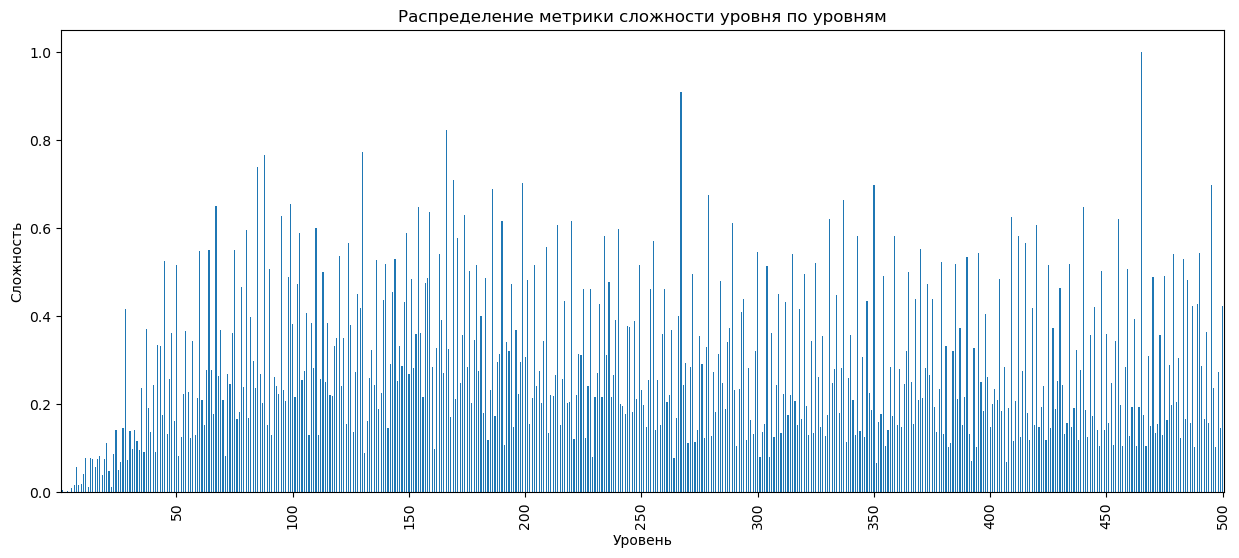

In [402]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Посчитаем - сколько раз каждый пользователь для каждого уровня проиграл и выйграл (completed и failed)
df_hard_metric_total = df_hard_metric.groupby(['uid','level','action']).count()
df_hard_metric_total = df_hard_metric_total.reset_index()

# Выделим отдельно датафрейм с только проигравшими пользователями, которые на определенном уровне только проиграли и дальше
# не выигрывали
df_hard_metric_total_failed = df_hard_metric_total.reset_index()
df_hard_metric_total_failed = df_hard_metric_total_failed.sort_values(by=['uid','level'])
# Это действие удалит записи одинаковых пользователей одинакового уровня failed и completed
df_hard_metric_total_failed.drop_duplicates(subset=['uid', 'level'], inplace = True)
# Это действие уберет записи пользователей которые выигрывали с первого раза completed
df_hard_metric_total_failed=df_hard_metric_total_failed[df_hard_metric_total_failed['action']=='failed']

#Это действие в наш основной фрейм вернет NaN в те строки, которые встречаются во фрейме с только 
# проигравшими пользователями
df_hard_metric_win = df_hard_metric_total[~df_hard_metric_total.isin(df_hard_metric_total_failed)]

# Уберем NaN и получим необходимый фрейм с пользователями и уровнями, которые проигрывая обязательно выигрывали
df_hard_metric_win = df_hard_metric_win.dropna(axis=0)

# Найдем для каждого пользователя и уровня сумму результативных действий и уберем колонку с пользователями, больше она не
# нужна
df_hard_metric_win = df_hard_metric_win.groupby(['uid','level']).agg({'event_time':['sum']}).reset_index()
df_hard_metric_win = df_hard_metric_win.drop('uid', axis=1, level=0)

# Здесь основная цель - посчитать статистику по результативным действиям, а именно среднее и медианное значение 
# результативных действий для каждого уровня
# Но как и в любом распределении, у нас могут быть выбросы. Уберем выбросы из статистики методом межквартильного
# анализа, предположив, что выброс - это значение превышающее размах между 1 (25%) и 3(75%) квартилем в 1,5 раза

# Создадим три массива - основной, массив для очищенных средних значений, массив для очищенных медианных значений
# и массив для уровня

massive = []


mean_clean = []
median_clean =[]
level=[]

# Для каждого уровня наполним и очистим массивы из нашего основного датафрейма

for i in range(1,501):
    df_hard_metric_win_i = df_hard_metric_win[df_hard_metric_win['level'] == i]
    massive = df_hard_metric_win_i['event_time']['sum'].to_frame().reset_index()    
    massive.drop(['index'], axis=1, inplace=True)
    q1 = massive.quantile(q=0.25)
    q3 = massive.quantile(q=0.75)
    qr = massive.apply(stats.iqr)
    massive_clean = massive[~((massive < (q1-1.5*qr)) | (massive > (q3+1.5*qr))).any(axis=1)]
    mean_clean.append(massive.mean()['sum'])    
    median_clean.append(massive.median()['sum'])
    level.append(i)    
   

# Создадим итоговый фрейм с нашими результатами по средней и медианной сложности уровня

df_final = pd.DataFrame({'level': level, "mean": mean_clean, "median": median_clean})
df_final.set_index('level', inplace=True)

df_final['hardness_metric'] = round((df_final['mean'] - df_final['mean'].min())/(df_final['mean'].max()-df_final['mean'].min()),3)


# Выделим уровень с максимальной сложностью 1 нашей метрики
df_final_max = df_final[df_final['hardness_metric'] == df_final['hardness_metric'].max()]
df_final_max.reset_index(inplace=True)
print('Уровень с максимальной сложностью '+str(int(df_final_max.iloc[0]['hardness_metric']))+' - '+str(int(df_final_max.iloc[0]['level'])))

# Выделим уровень с минимальной сложностью 0 нашей метрики
df_final_min = df_final[df_final['hardness_metric'] == df_final['hardness_metric'].min()]
df_final_min.reset_index(inplace=True)
print('Уровень с минимальной сложностью '+str(int(df_final_min.iloc[0]['hardness_metric']))+' - '+str(int(df_final_min.iloc[0]['level'])))

# Выделим среднюю и медианную метрику сложности по всем уровням
print('Средняя метрика сложности - '+str(round(df_final['hardness_metric'].mean(),2)))
print('Медианная метрика сложности - '+str(round(df_final['hardness_metric'].median(),2)))

# Построим распределение нашей метрики по всем уровням

plt.figure(figsize=(15, 6))
df_final['hardness_metric'].plot.bar(legend = False)
plt.title("Распределение метрики сложности уровня по уровням")
plt.xlabel("Уровень")
plt.ylabel("Сложность")
plt.xticks(ticks=[49,99,149,199,249,299,349,399,449,499])
df_final


In [405]:
# --------------------ЗАДАНИЕ 2---------------------------

# Будем работать с новым фреймом и проверим - все ли прошли первый уровень

df_funnel = df_hard_metric.copy()

df_funnel_failed = df_funnel[(df_funnel['action']=='failed') & (df_funnel['level']== 1)]

absent_values = df_funnel_failed[~df_funnel_failed['uid'].isin(df_funnel['uid'])]

print('Все прошли уровень 1')
absent_values

Все прошли уровень 1


,uid,action,level,event_time


Всего уникальных игроков в датафрейме =  169004
    level  uid  summa shifted_sum  Funnel_1  Funnel_2
14    486   23    690       705.0     97.87      0.41
13    487    5    667       690.0     96.67      0.39
12    488   19    662       667.0     99.25      0.39
11    489   24    643       662.0     97.13      0.38
10    490   15    619       643.0     96.27      0.37
9     491   12    604       619.0     97.58      0.36
8     492   35    592       604.0     98.01      0.35
7     493    7    557       592.0     94.09      0.33
6     494   59    550       557.0     98.74      0.33
5     495   19    491       550.0     89.27      0.29
4     496   17    472       491.0     96.13      0.28
3     497   24    455       472.0     96.40      0.27
2     498    8    431       455.0     94.73      0.26
1     499   37    423       431.0     98.14      0.25
0     500  386    386       423.0     91.25      0.23


,level,uid,summa,shifted_sum,Funnel_1,Funnel_2
499,1,2430,169004,-,100.00,100.00
498,2,1139,166574,169004.0,98.56,98.56
497,3,586,165435,166574.0,99.32,97.89
496,4,757,164849,165435.0,99.65,97.54
495,5,1238,164092,164849.0,99.54,97.09
...,...,...,...,...,...,...
4,496,17,472,491.0,96.13,0.28
3,497,24,455,472.0,96.40,0.27
2,498,8,431,455.0,94.73,0.26
1,499,37,423,431.0,98.14,0.25


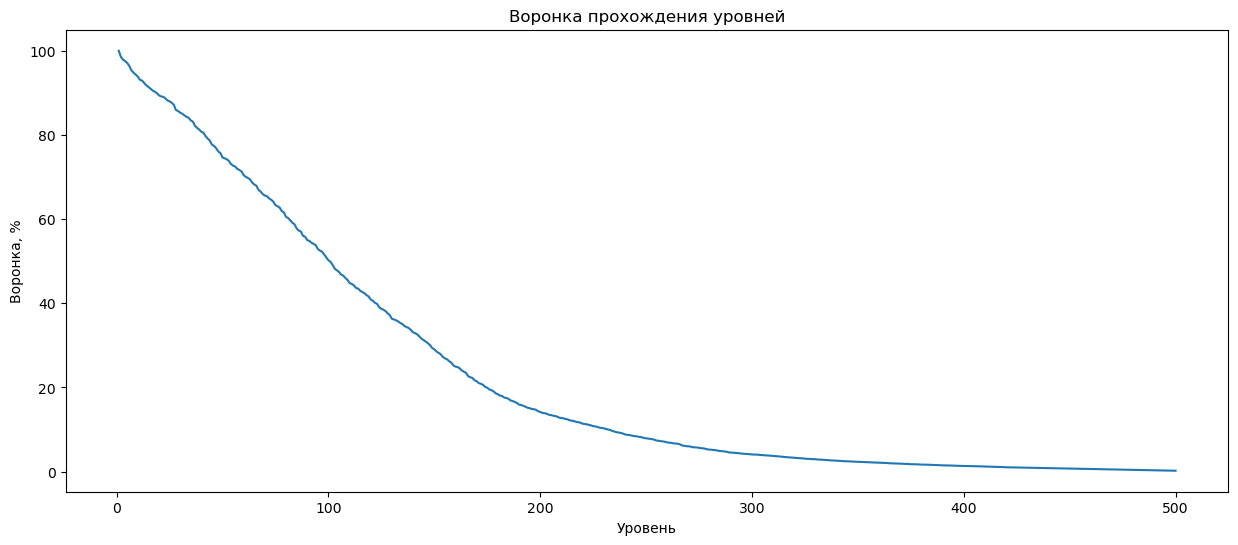

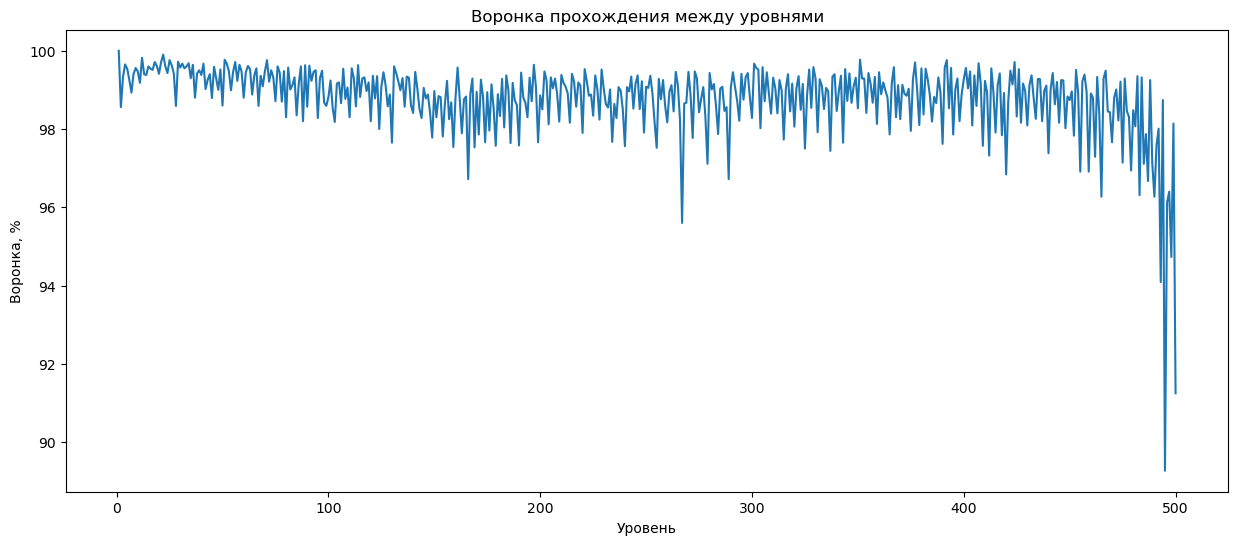

In [408]:
# Выделим только значения с меткой пройденного уровня
df_funnel = df_hard_metric.copy()
df_funnel = df_funnel[df_funnel['action']=='completed']

# Уберем колонки 'action','event_time' для экономии памяти, в этой задаче они не нужны
df_funnel = df_funnel.drop(['action','event_time'],axis=1)

# Посчитаем сколько всего у нас игроков во фрейме
total_gamers = df_funnel['uid'].nunique()
print('Всего уникальных игроков в датафрейме = ', total_gamers)

# Воронку будем считать следующим образом. Если условно во фрейме первая запись по игроку - 30 уровень completed, то считаем, 
# что этот игрок прошел и все уровни до 30 - и так с каждым игроком. Для этого сгруппируем фрейм по пользователям и для 
# каждого пользователя найдем максимальный уровень до которого он дошел
df_funnel = df_funnel.groupby('uid').max().sort_values(by=('level'), ascending = False).reset_index()

# А получившийся датафрейм снова сгруппируем по уровню и посчитаем количество пользователей, которое дошло до этого уровня
df_funnel = df_funnel.groupby('level').count().sort_values(by=('level'), ascending = False).reset_index()

# Посчитаем с 500ого по 1й уровень кумулятивную сумму, которая и будет являться воронкой, выраженной в количестве пользователей 
# по уровням. Отметим, что Всего уникальных игроков в датафрейме  169004 и согласно фрейму все они прошли 1 уровень

df_funnel['summa'] = df_funnel['uid'].cumsum()
df_funnel = df_funnel.sort_values(by=('level'), ascending = True)

# Посчитаем основную воронку Funnel_2 и воронку прохождения между уровнями Funnel_1 в процентах

df_funnel['shifted_sum'] = df_funnel['summa'].shift(1)

df_funnel['Funnel_1'] = round(df_funnel['summa'] / df_funnel['shifted_sum'] * 100,2)

df_funnel['Funnel_2'] = round(df_funnel['summa'] / df_funnel['summa'].max() * 100,2)
df_funnel['Funnel_1'] = df_funnel['Funnel_1'].fillna(100.00)
df_funnel['shifted_sum'] = df_funnel['shifted_sum'].fillna('-')

# Визуализируем полученные результаты

df_funnel.plot(x='level', y='Funnel_2', legend = False,figsize=(15, 6))
plt.title("Воронка прохождения уровней")
plt.xlabel("Уровень")
plt.ylabel("Воронка, %")

df_funnel.plot(x='level', y='Funnel_1', legend = False,figsize=(15, 6))
plt.title("Воронка прохождения между уровнями")
plt.xlabel("Уровень")
plt.ylabel("Воронка, %")

print(df_funnel.tail(15))
df_funnel

In [409]:
# Дополнение к заданию 1

# Данная метрика не основная, но проанализировать ради интереса стоит. Метрика - среднее время, которое тратит
# пользователь на прохождение уровня

# Считать среднее время будем в отдельном датафрейме

df_metric = df_main.copy()
df_metric_completed = df_metric[(df_metric['action'] == 'completed')]
df_metric_completed = df_metric_completed.sort_values(by=['uid','level','event_time'], ascending = True)

# Во фрейме есть записи с разными по времени завершениями одного и того же уровня. Предположим, что такое невозможно, 
# оставив первый по времени момент завершения уровня данным пользователем 
df_metric_completed.drop_duplicates(subset = ('uid','action','level'), keep = 'first', inplace = True)


# Чтобы посчитать время прохождения 1 уровня - необходимо создать отдельный фрейм и выделить самое первое по времени появление
# failed для каждого юзера

df_metric_failed_1 = df_metric[(df_metric['action'] == 'failed') & (df_metric['level'] == 1)]
df_metric_failed_1 = df_metric_failed_1.sort_values(by=['uid','event_time'], ascending = True)
df_metric_failed_1.drop_duplicates(subset = ('uid','action','level'), keep = 'first', inplace = True)

# Для удобства зададим этому фрейму значение уровня 0 и completed

df_metric_failed_1['level'] = 0
df_metric_failed_1['action'] = 'completed'


print(df_metric_failed_1.shape)

# Таких записей у нас всего 11, что на статистику не повлияет, но все равно присоединим этот фрейм к основному

df_metric_common = pd.concat([df_metric_completed,df_metric_failed_1])

df_metric_common = df_metric_common.sort_values(by=['uid','level','event_time'], ascending = True)

df_metric_common['prev_time'] = df_metric_common.groupby(['uid'])['event_time'].shift(1) 


# Посчитаем непосредственно время прохождения каждого уровня каждым пользователем фрейма в секундах

df_metric_common.dropna(inplace = True)


df_metric_common['speed'] = (df_metric_common['event_time']-df_metric_common['prev_time'])/1000


df_metric_common

(11, 4)


,uid,action,level,event_time,prev_time,speed
1161855,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,completed,91,1512249715495,1.512250e+12,0.000
2210711,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,completed,92,1512272311861,1.512250e+12,22596.366
2210705,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,completed,93,1512341336455,1.512272e+12,69024.594
2795742,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,completed,94,1512435379653,1.512341e+12,94043.198
3949295,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,completed,95,1512690020321,1.512435e+12,254640.668
...,...,...,...,...,...,...
9473011,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,completed,149,1513459615239,1.513449e+12,10583.909
9473009,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,completed,150,1513459814501,1.513460e+12,199.262
9472991,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,completed,151,1513460336653,1.513460e+12,522.152
9473027,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,completed,152,1513461515717,1.513460e+12,1179.064


In [410]:
# Посмотрим есть ли в нашем фрейме отрицательные записи - например по ошибке в базе данных оказалось так, что более 
# высокий уровень был пройден раньше, чем более низкий уровень

negative = df_metric_common[df_metric_common['speed'] < 0].count()
normal = df_metric_common.count()
perc_negative = round(negative['speed']/(normal['speed']-negative['speed'])*100,3)

print('Имеем ' + str(negative['speed'])+ ' отрицательных записей, что составляет '+str(perc_negative)+' % от нормальных записей, поэтому выкидываем эти значения')
df_metric_common = df_metric_common[df_metric_common['speed'] >= 0]

df_metric_common


Имеем 430 отрицательных записей, что составляет 0.013 % от нормальных записей, поэтому выкидываем эти значения


,uid,action,level,event_time,prev_time,speed
1161855,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,completed,91,1512249715495,1.512250e+12,0.000
2210711,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,completed,92,1512272311861,1.512250e+12,22596.366
2210705,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,completed,93,1512341336455,1.512272e+12,69024.594
2795742,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,completed,94,1512435379653,1.512341e+12,94043.198
3949295,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,completed,95,1512690020321,1.512435e+12,254640.668
...,...,...,...,...,...,...
9473011,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,completed,149,1513459615239,1.513449e+12,10583.909
9473009,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,completed,150,1513459814501,1.513460e+12,199.262
9472991,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,completed,151,1513460336653,1.513460e+12,522.152
9473027,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,completed,152,1513461515717,1.513460e+12,1179.064


In [411]:
# Посчитаем среднее и медианное время прохождения для каждого уровня на неочищенном от выбросов фрейме
df_metric_common_levels = df_metric_common.groupby('level').agg({'speed': ['mean', 'median']})
df_metric_common_levels

speed           
               mean     median
level                         
1       3447.126833    45.4505
2       5772.787554     0.0000
3       4523.899930     0.0000
4       3994.207754     0.0000
5       5273.590888     0.0000
...             ...        ...
496    24015.552502   726.9770
497     9551.779950     0.0000
498    15606.668028     0.0000
499    24211.843799     0.0000
500    29923.049535  1369.6050

[500 rows x 2 columns]

Уровни с максимальной продолжительностью 20 ч- [130]
Уровни с минимальной продолжительностью 0 - [ 2  3  4  5  6  9 12 22]
Средняя продолжительность - 2.57 ч
Медианная продолжительность - 1.23 ч


,mean,median
level,,
1,0.053949,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
...,...,...
496,0.805369,0.000000
497,0.128179,0.000000
498,0.885514,0.000000


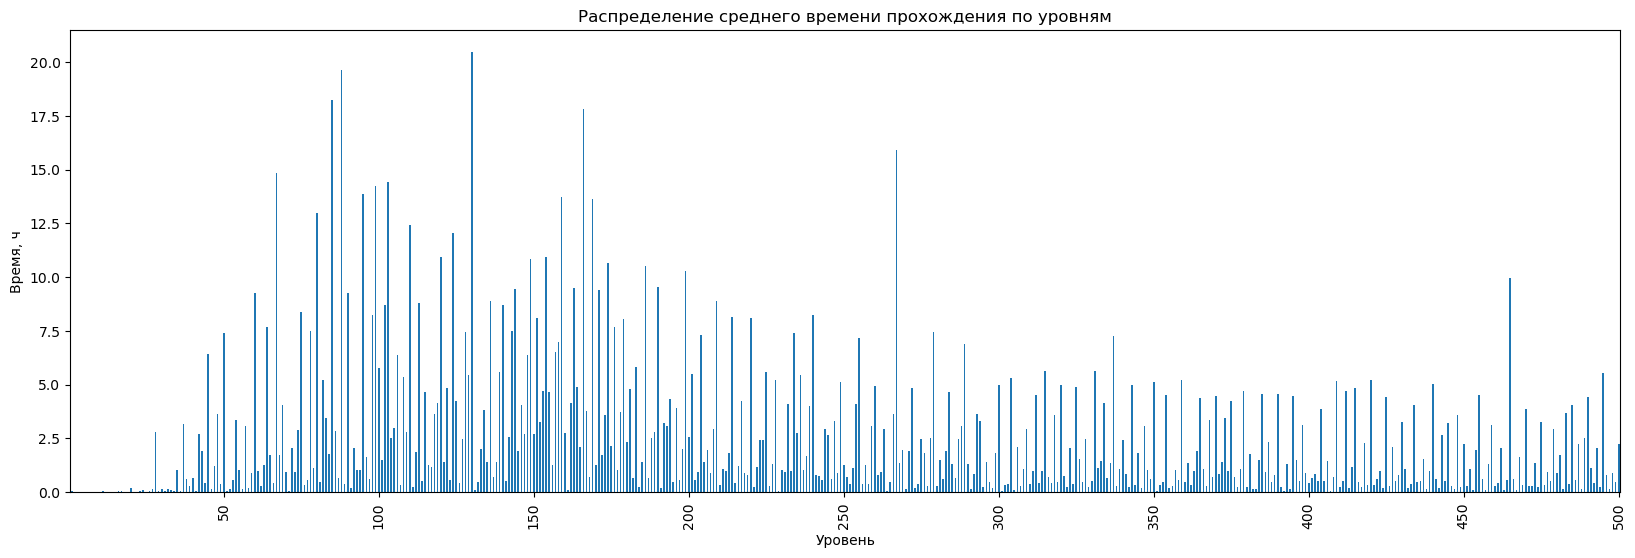

In [412]:
# Здесь основная цель посчитать статистику по времени прохождения, а именно среднее и медианное значение времени для каждого уровня
# Но как и в любом распределении, у нас могут быть выбросы. Уберем выбросы из статистики методом межквартильного
# анализа, предположив, что выброс - это значение превышающее размах между 1 (25%) и 3(75%) квартилем в 1,5 раза

# Создадим три массива - основной, массив для очищенных средних значений, массив для очищенных медианных значений
# и массив для уровня


mean_clean = []
median_clean =[]
level=[]
for i in range(1,501):
    

    df_metric_common_1 = df_metric_common[df_metric_common['level'] == i]

    massive_speed = df_metric_common_1['speed'].to_frame().reset_index()
    massive_speed.drop(['index'], axis=1, inplace=True)
    q1 = massive_speed.quantile(q=0.25)
    q3 = massive_speed.quantile(q=0.75)
    qr = massive_speed.apply(stats.iqr)
    massive_speed_clean = massive_speed[~((massive_speed < (q1-1.5*qr)) | (massive_speed > (q3+1.5*qr))).any(axis=1)]
    mean_clean.append(massive_speed_clean.mean()['speed']/3600)
    median_clean.append(massive_speed_clean.median()['speed']/3600)
    level.append(i)


# Заполним итоговый фрейм    
df_final1 = pd.DataFrame({'level': level, "mean": mean_clean, "median": median_clean})
df_final1.set_index('level', inplace=True)


# Посчитаем Уровни с максимальной и минимальной продолжительностью

df_final1_max = df_final1[df_final1['mean'] == df_final1['mean'].max()]


df_final1_max.reset_index(inplace=True)

array_max = df_final1_max['level'].to_numpy()
print('Уровни с максимальной продолжительностью '+str(int(df_final1_max.iloc[0]['mean']))+' ч- '+str(array_max))


df_final1_min = df_final1[df_final1['mean'] == df_final1['mean'].min()]
df_final1_min.reset_index(inplace=True)
array_min = df_final1_min['level'].to_numpy()
print('Уровни с минимальной продолжительностью '+str(int(df_final1_min.iloc[0]['mean']))+' - '+str(array_min))

print('Средняя продолжительность - '+str(round(df_final1['mean'].mean(),2))+' ч')
print('Медианная продолжительность - '+str(round(df_final1['mean'].median(),2))+' ч')


plt.figure(figsize=(20, 6))
df_final1['mean'].plot.bar(legend = False)
plt.title("Распределение среднего времени прохождения по уровням")
plt.xlabel("Уровень")
plt.ylabel("Время, ч")
plt.xticks(ticks=[49,99,149,199,249,299,349,399,449,499])
df_final1


In [284]:
# ---------------------------------ИТОГИ и ВЫВОДЫ-------------------------------------------------

# --------------------------Задание 1-------------------------------------------------------------

# В качестве ОСНОВНОЙ метрики, показывающей сложность уровня я предлагаю использовать нормированное между 0 и 1 
# значение - сколько раз в среднем для данного уровня нужно сделать результативных действий, а именно 
# проиграть (failed) и выйграть (completed). При этом очень важно выкинуть из расчета пользователей, которые для какого-то уровня 
# проиграли (failed) и остановились, не пошли дальше. Учитывать только тех, кто обязательно в итоге выйграл. Потому что остановиться
# и не пойти дальше пользователь мог по разным причинам, а такие, только проигравшие пользователи, сильно подпортят статистику.
# Выделять метрику будем в отдельном датафрейме

# В итоге:

# Уровень с максимальной сложностью 1 - 465
# Уровень с минимальной сложностью 0 - 4
# Средняя метрика сложности - 0.29
# Медианная метрика сложности - 0.25

# Задание 1 дополнительно

# Данная метрика не основная. Метрика - среднее время, которое тратит
# пользователь на прохождение уровня. В аспекте данного задания и фрейма этой метрикой пользоваться НЕЛЬЗЯ, потому что
# во фрейме есть много очень больших времен прохождения уровней, что скорей всего свидетельствует о том, что пользователь 
# отвлекался от игры по естесственным причинам. НО данная метрика будет иметь смысл, если привязать ее к длине сессии. 
# То есть считать среднее время прохождения уровня в рамках одной сессии пользователя без отрыва от игры.
# Но в рамках данного фрейма были получены следующие результаты:
# Уровни с максимальной продолжительностью 20 ч- [130]
# Уровни с минимальной продолжительностью 0 - [ 2  3  4  5  6  9 12 22]
# Средняя продолжительность - 2.57 ч
# Медианная продолжительность - 1.23 ч

# --------------------------Задание 2-------------------------------------------------------------

# "воронка" прохождения уровней новым пользователем после установки игры представлена на соответствующем графике выше.

# Стоит отметить что воронка прохождения пользователей между уровнями практически одинакова и лежит в диапазоне 96-100%, 
# и только на 495 и 500 м уровне падает до 89% и 91%, соответственно


